# DATA PRE PROCESSING
    

We have these 5 data sets that we are to work with to get the loyalty scores.

File descriptions

1. train.csv - the training set

2. test.csv - the test set

3. historical_transactions.csv - up to 3 months' worth of historical transactions for each card_id

4. merchants.csv - additional information about all merchants / merchant_ids in the dataset.

5. new_merchant_transactions.csv - two months' worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data

details of these tables have been mentioned below

Pre Processing and EDA for Train dataset


In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
# Function to get name of any variable
def r_name(x, Vars=vars()):
    for k in Vars:
        if x is Vars[k]:
            return k            
    return None

In [3]:
#function to plot and calculate pdf and cdf of a column

def pdf_cdf(Column,Dataset,bins = 50,s_data= True):
    
    #retrieve name of the dataset
    
    Var = vars()
    '''for k in Var:
        if type(Dataset) == type(Var[k]):
            if Dataset is Var[k]:
                nme = k'''
    
    nme = r_name(Dataset)
    
    #Calculating PDF
    
    counts,binedges = np.histogram(Dataset[Column],bins,density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    if s_data: 
        print("\n{}-{} PDF-Data\n: {}\n".format(nme,Column,pdf))
        print("\n{}-{} CDF-Data\n: {}\n".format(nme,Column,cdf))
        
    #print(nme)
    
    plt.plot(binedges[1:],pdf,label = nme+"-"+Column+"_PDF")
    plt.plot(binedges[1:],cdf,label = nme+"-"+Column+"_CDF")
    plt.xlabel(Column)
    plt.legend()
    return 

# EDA on Train data set

In [4]:
#About Train Data_Set
About_train = pd.read_excel("Data Dictionary.xlsx",header=2)

About_train

,Columns,Description
0,card_id,Unique card identifier
1,first_active_month,"'YYYY-MM', month of first purchase"
2,feature_1,Anonymized card categorical feature
3,feature_2,Anonymized card categorical feature
4,feature_3,Anonymized card categorical feature
5,target,Loyalty numerical score calculated 2 months af...


In [5]:
#About Train
train_table  = pd.read_csv('train.csv',parse_dates = ["first_active_month"])
train_table

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749
...,...,...,...,...,...,...
201912,2017-09-01,C_ID_963962de2c,3,2,1,-2.740821
201913,2015-10-01,C_ID_1314773c0b,3,1,1,0.312917
201914,2017-08-01,C_ID_7666735b3d,4,3,0,0.093494
201915,2016-07-01,C_ID_73f5a0efd0,3,2,1,-4.676589


In [6]:
train_cards = train_table.card_id.unique()
print("No of unique card ids_: ",len(train_table.card_id.unique()))

No of unique card ids_:  201917


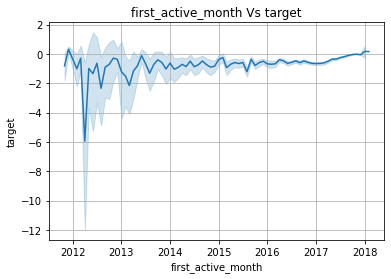

In [7]:
sns.lineplot(x = train_table['first_active_month'], y= train_table['target'])
plt.title("first_active_month Vs target")
plt.grid()
plt.show()

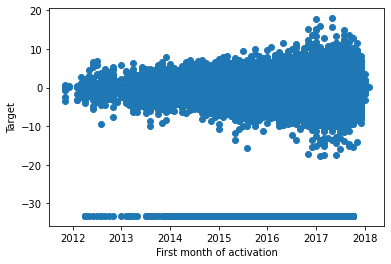

In [8]:
import matplotlib.pyplot as plt
plt.scatter(train_table['first_active_month'],train_table['target'])
plt.xlabel('First month of activation')
plt.ylabel('Target')
plt.show()

In [9]:
# checking if there is any missing values

train_table.isna().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

## EDA on Target

No handles with labels found to put in legend.


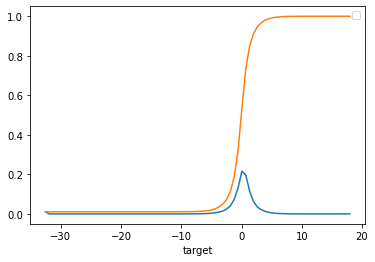

In [10]:
#PDF and CDF of Target column
pdf_cdf('target',train_table,bins = 80,s_data =False)

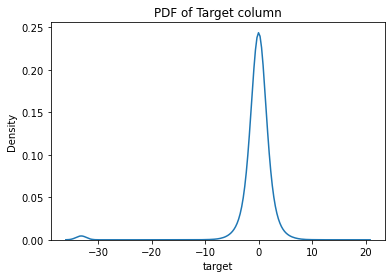

In [11]:
#PDF of target column using sns

data = train_table.target
sns.kdeplot(data,bw=0.25)
plt.title("PDF of Target column")
plt.show()

In [12]:
# no of target values below -30
train_table.target[train_table.target <= -30].count()

2207

In [13]:
# No of target values between -.01 to +.01
train_table.target[(train_table.target <= -.01) + (train_table.target <= +.01) ].count()

105092

From above 2 plots we can see most of the data is distributed between -10 to +10 though
some distribution can noticed below -30 as well.

Apart from this we can see most of the values are tend have 0 loyalty score . 

This could mean data has been standardized at first and the this values below -30 has been added. 
But I'd not like to consider it as outliers now since data seems to be normally distributed there.


# Performnace metrics to be used

From above EDA of target coulmn we can see that it consist of continous random variables. Thus it's a rgression problem.
So for evaluation, performance metrics that can be used is RMSE.

The Root Mean Squared Error, or RMSE, is an extension of the mean squared error.

Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.

For example, if your target variable has the units “dollars,” then the RMSE error score will also have the unit “dollars” and not “squared dollars” like the MSE.

RMSE is calculted by this

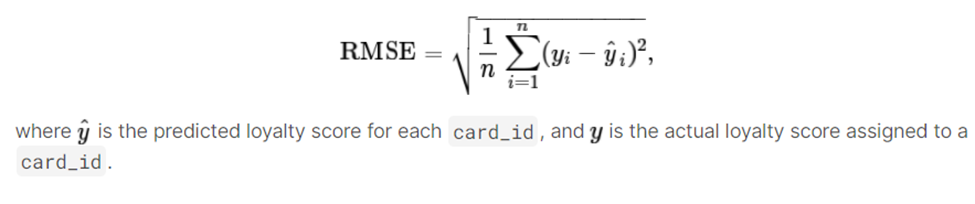


## EDA on feature 1,2,3

In [14]:
#Value count of featue_1
train_table['feature_1'].value_counts()

3    73573
2    55797
5    40625
4    19885
1    12037
Name: feature_1, dtype: int64

In [15]:
#Value count of featue_2
train_table['feature_2'].value_counts()

1    89242
2    74839
3    37836
Name: feature_2, dtype: int64

In [16]:
#Value count of featue_3
train_table['feature_3'].value_counts()

1    114198
0     87719
Name: feature_3, dtype: int64

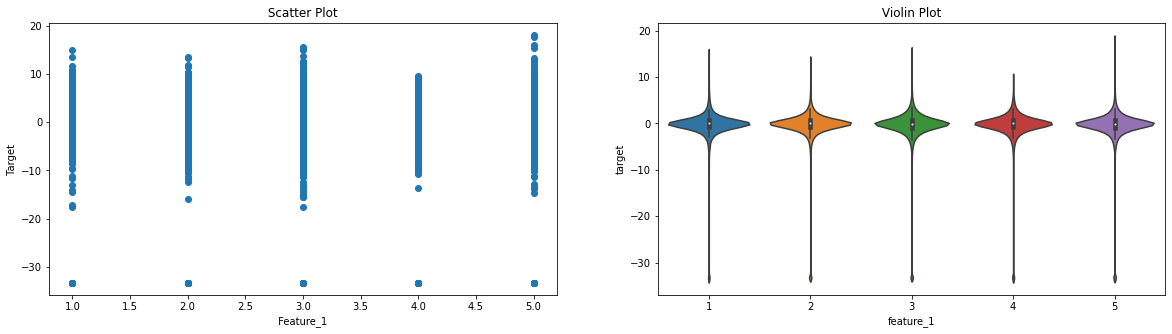

In [17]:
#Plotting for feture_1
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(train_table['feature_1'],train_table['target'])
plt.xlabel(" Feature_1 ")
plt.ylabel(" Target ")
plt.title(" Scatter Plot ")
plt.subplot(1,2,2)
sns.violinplot(x = 'feature_1',y = 'target',data = train_table)
plt.title(" Violin Plot ")
plt.show()

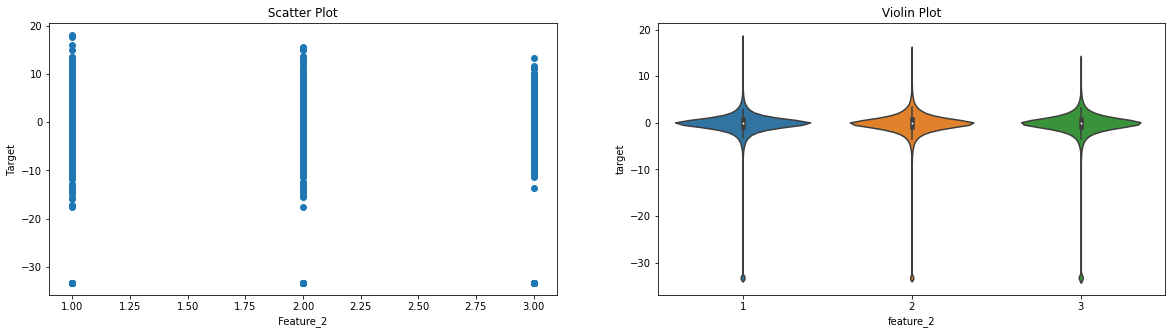

In [17]:
#Plotting for feture_2
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(train_table['feature_2'],train_table['target'])
plt.xlabel(" Feature_2 ")
plt.ylabel(" Target ")
plt.title(" Scatter Plot ")
plt.subplot(1,2,2)
sns.violinplot(x = 'feature_2',y = 'target',data = train_table)
plt.title(" Violin Plot ")
plt.show()

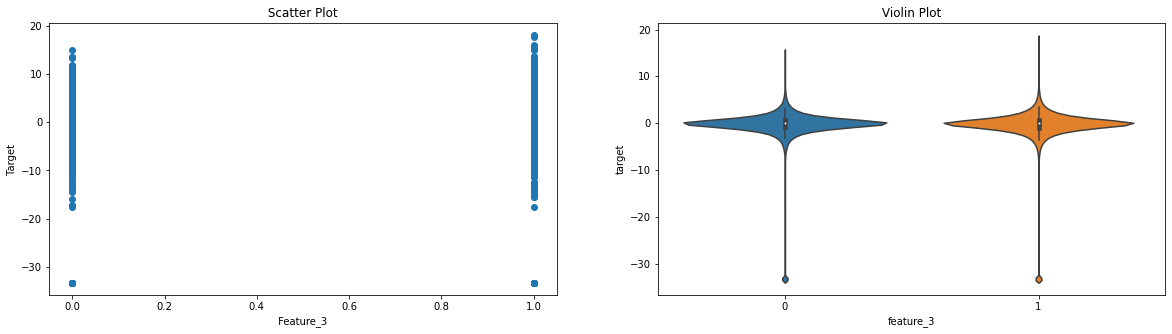

In [18]:
#Plotting for feture_3
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(train_table['feature_3'],train_table['target'])
plt.xlabel(" Feature_3 ")
plt.ylabel(" Target ")
plt.title(" Scatter Plot ")
plt.subplot(1,2,2)
sns.violinplot(x = 'feature_3',y = 'target',data = train_table)
plt.title(" Violin Plot ")
plt.show()

In [ ]:
# Test data set missing value status

In [20]:
#About Test
test_table  = pd.read_csv('test.csv',parse_dates = ["first_active_month"])

test_table

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1
...,...,...,...,...,...
123618,2017-10-01,C_ID_7a239d2eda,2,2,0
123619,2017-09-01,C_ID_75ace375ae,3,1,1
123620,2016-09-01,C_ID_21d56d950c,5,1,1
123621,2017-06-01,C_ID_6c46fc5a9d,2,1,0


In [21]:
# checking if there is any missing values

test_table.isna().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [22]:
test_table.loc[test_table.first_active_month.isna()]

,first_active_month,card_id,feature_1,feature_2,feature_3
11578,NaT,C_ID_c27b4f80f7,5,2,1


In [23]:
test_table.first_active_month.value_counts()

2017-09-01    8805
2017-10-01    8451
2017-08-01    8299
2017-11-01    7807
2017-07-01    7344
              ... 
2012-03-01      10
2012-02-01       4
2011-11-01       3
2011-12-01       2
2012-01-01       1
Name: first_active_month, Length: 75, dtype: int64

In [24]:
test_cards = test_table.card_id.unique()
print("No of unique card ids_ in test data set: ",len(test_table.card_id.unique()))

No of unique card ids_ in test data set:  123623


In [25]:
# imputing missing date with most frequent date which is 2017-09-01 

In [26]:
test_table.loc[test_table.first_active_month == '2017-09-01'].head(1)

,first_active_month,card_id,feature_1,feature_2,feature_3
17,2017-09-01,C_ID_15489b42d3,4,3,0


In [27]:
test_table_pp = test_table.fillna(test_table.first_active_month[17])
test_table_pp.head(4)

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0


In [28]:
test_table_pp.isna().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

# Missing data analysis for Historical Trasaction

In [18]:
#About Historical_Transaction Data_Set
About_Historical_Transaction = pd.read_excel("Data Dictionary.xlsx",header=2,sheet_name = "history")

About_Historical_Transaction

,Columns,Description
0,card_id,Card identifier
1,month_lag,month lag to reference date
2,purchase_date,Purchase date
3,authorized_flag,"Y' if approved, 'N' if denied"
4,category_3,anonymized category
5,installments,number of installments of purchase
6,category_1,anonymized category
7,merchant_category_id,Merchant category identifier (anonymized )
8,subsector_id,Merchant category group identifier (anonymized )
9,merchant_id,Merchant identifier (anonymized)


In [19]:
#https://www.kaggle.com/fabiendaniel/elo-world
#Function to load data into pandas and reduce memory usage

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


In [20]:
Historical_Transaction = reduce_mem_usage(pd.read_csv("historical_transactions.csv",parse_dates=['purchase_date']))


Mem. usage decreased to 1749.11 Mb (43.7% reduction)


In [21]:
Historical_Transaction.head(5)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [90]:
Historical_Transaction.isna().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [35]:

Historical_Transaction[["installments","month_lag","purchase_amount"]].describe()


,installments,month_lag,purchase_amount
count,2.911236e+07,2.911236e+07,2.911236e+07
mean,6.484954e-01,-4.487294e+00,3.640090e-02
std,2.795577e+00,3.588800e+00,1.123522e+03
min,-1.000000e+00,-1.300000e+01,-7.469078e-01
25%,0.000000e+00,-7.000000e+00,-7.203559e-01
50%,0.000000e+00,-4.000000e+00,-6.883495e-01
75%,1.000000e+00,-2.000000e+00,-6.032543e-01
max,9.990000e+02,0.000000e+00,6.010604e+06


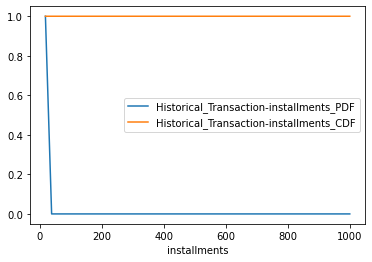

In [36]:
#PDF and CDF plot of these numerical features
pdf_cdf('installments',Historical_Transaction,s_data=False)

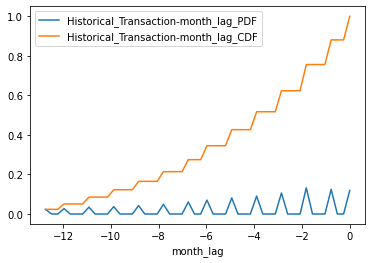

In [37]:
pdf_cdf('month_lag',Historical_Transaction,s_data=False)


Historical_Transaction-purchase_amount PDF-Data
: [9.99999691e-01 2.74797362e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.43496702e-08]


Historical_Transaction-purchase_amount CDF-Data
: [0.99999969 0.99999997 0.99999997 0.99999997 0.99999997 0.99999997
 0.99999997 0.99999997 0.99999997 0.99999997 0.99999997 0.99999997

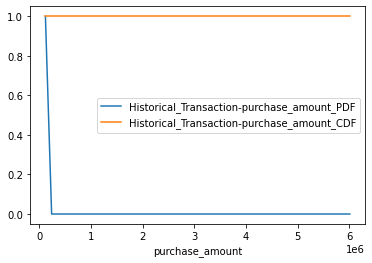

In [38]:
pdf_cdf('purchase_amount',Historical_Transaction)

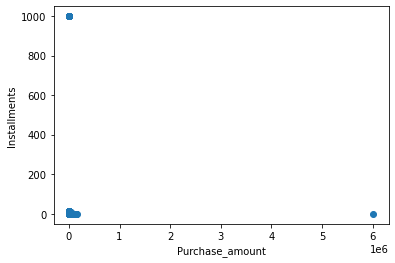

In [13]:
# Scatter Plot between Purchse_amount vs installments
plt.scatter(Historical_Transaction.purchase_amount,Historical_Transaction.installments)
plt.xlabel("Purchase_amount")
plt.ylabel("Installments")
plt.show()

### Exploring columns with categorical values 

In [22]:
Historical_Transaction.category_1.value_counts()

N    27028332
Y     2084029
Name: category_1, dtype: int64

In [42]:
Historical_Transaction.category_2.value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [43]:
Historical_Transaction.category_3.value_counts()

A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

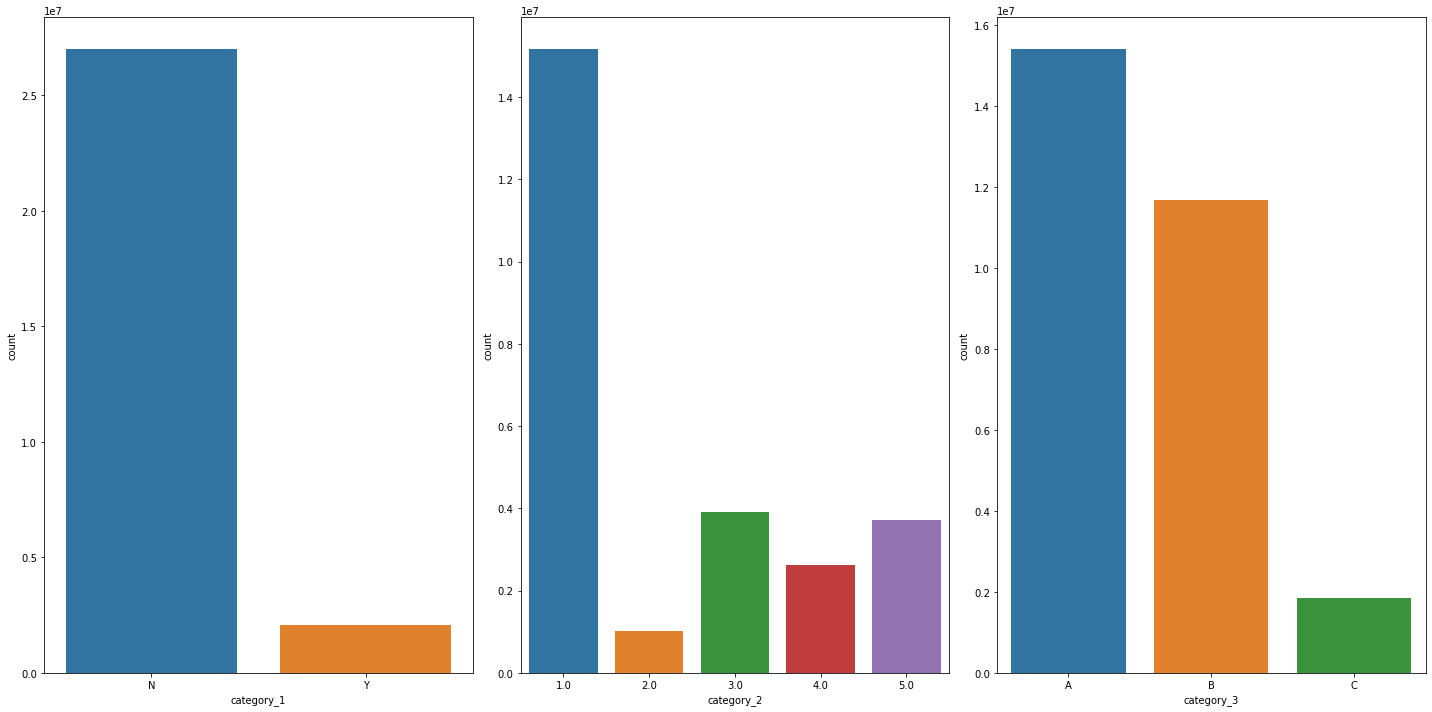

In [31]:
#Bar PLots for category 1, 2, 3

fig, axis = plt.subplots(ncols=3, figsize=(20, 10))

for i in range(1,4):

    sns.countplot(x = 'category_'+str(i), data = Historical_Transaction, ax = axis[i-1])
    
fig.tight_layout()
plt.show()

In [44]:
Historical_Transaction.merchant_id.value_counts()

M_ID_00a6ca8a8a    1115097
M_ID_e5374dabc0     428619
M_ID_9139332ccc     361385
M_ID_50f575c681     183894
M_ID_fc7d7969c3     177040
                    ...   
M_ID_e5f2c7e685          1
M_ID_437a5a14a9          1
M_ID_b62fd56d1c          1
M_ID_6a903de20c          1
M_ID_cc4d12f06a          1
Name: merchant_id, Length: 326311, dtype: int64

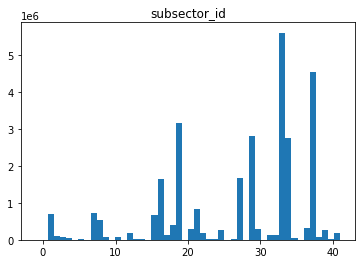

Unique Values  [37 16 34 41 29  7 33  2 36 25 15 19 10 30 18  8 27  1 39 32 22 20 21  9
 17 38 12 26 31 13 35  5 23  3  4 14 24 40 11 -1 28]


In [49]:
plt.hist(Historical_Transaction.subsector_id,bins = 50)
plt.title("subsector_id")
plt.show()
print("Unique Values ",Historical_Transaction.subsector_id.unique())


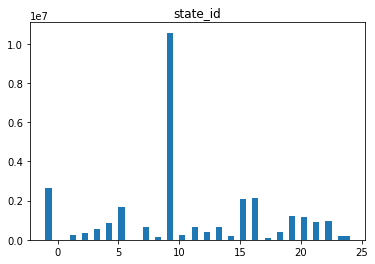

Unit Values :  [16  9 -1 11 15 17  5 24 19 23  3  8 18  7  4 22 13  1 10 21 20 14  2 12
  6]


In [46]:
plt.hist(Historical_Transaction.state_id,bins = 50)
plt.title("state_id")
plt.show()

print("Unit Values : ",Historical_Transaction.state_id.unique())

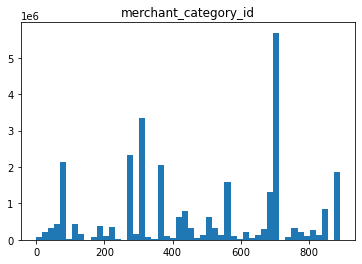

Unique Values :  [ 80 367 560 278 683 130 879 511 842 561 705 332 111 528 437 605 387  19
 307 333 506 108  45 813 755 290  68 419 703 884 391 414 783 360 454 105
 650 670 574 180  87 434 401 309 330 840 273 544 839 302 195 299 792 557
 383 606 289 443 415 637 478 667 126  34 818 834 222 690 514 706 422  90
 319 114 630 529   2 412  14 179 661 695 774 206 462 356 642 489 154  40
 340  60 769 171 166 411 614 373 216  36   9 795 748 298 363 519 734 499
 737 554 210 531 427 779 369 843  56 178 317  16 384 836 823 771  78 420
 796 692 215 573 458 246 527  63  21 518 320 665 550 491 623 451 829 526
 274 607 891 671 438 497 498 793 761  69 471 507 386 645 181  33 398 472
 536 248 409 656 357 631 342 225 480 117 763 385 534 241 651 184 827 417
 702 504 889 400 224 119  57 157 115  38 669 198 593 396 432 885 652  -1
 474 312 351 854 267 873 613 110 223  81 217 315  71 276 172 568 416 751
 456 348 781 662 109 245 259 685  83 551 696 676 469 598 260 556 457 819
 806 374 847 101 292 546 790 343 7

In [47]:
plt.hist(Historical_Transaction.merchant_category_id,bins = 50)
plt.title("merchant_category_id")
plt.show()

print("Unique Values : ",Historical_Transaction.merchant_category_id.unique())

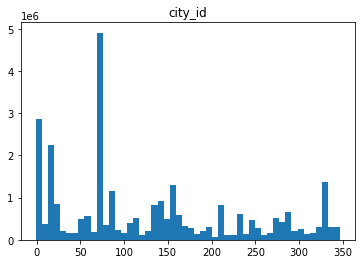

In [41]:
plt.hist(Historical_Transaction.city_id,bins = 50)
plt.title("city_id")
plt.show()

In [50]:
Historical_Transaction.isna().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [51]:
# No of unique cards in Historical_trasaction data set
Historical_Transaction_cards = Historical_Transaction.card_id.unique()
len(Historical_Transaction.card_id.unique())

325540

In [52]:
print("No of test card id that are not present in Historical_Tracsactiom: ",
      len(set(test_cards) - set(Historical_Transaction_cards)))

print("No of train card id that are not present in Historical_Tracsactiom: ",
      len(set(train_cards) - set(Historical_Transaction_cards)))

No of test card id that are not present in Historical_Tracsactiom:  0
No of train card id that are not present in Historical_Tracsactiom:  0


In [53]:
#imputting missing values with most frequent class

imputer = lambda x: x.fillna(x.value_counts().index[0])

Historical_Transaction_clean = Historical_Transaction.apply(imputer)
Historical_Transaction_clean

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112356,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,-1,-0.632706,2017-01-20 08:52:04,1.0,-1,34
29112357,Y,C_ID_2863d2fa95,-1,Y,1,B,360,M_ID_edd92b6720,0,-0.632706,2017-02-20 04:40:50,1.0,-1,34
29112358,Y,C_ID_5c240d6e3c,3,N,0,A,278,M_ID_9cdcfe8673,0,-0.657740,2017-12-26 18:37:51,1.0,16,37
29112359,Y,C_ID_5c240d6e3c,331,N,0,A,514,M_ID_1a75f94f92,-1,0.770620,2017-11-24 14:18:15,1.0,16,9


In [54]:
Historical_Transaction_clean.isna().sum()

authorized_flag         0
card_id                 0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
category_2              0
state_id                0
subsector_id            0
dtype: int64

In [57]:
Historical_Transaction_clean.to_csv("Historical_Transaction_clean")

## Data analysis for New Merchant Transaction

In [25]:
new_merchants_trasaction = pd.read_csv("new_merchant_transactions.csv")
#new_merchants_trasaction.loc[new_merchants_trasaction.card_id == "C_ID_4e6213e9bc"]
new_merchants_trasaction

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963026,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701828,2018-04-06 14:36:52,3.0,19,21
1963027,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694390,2018-03-07 13:19:18,1.0,15,34
1963028,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621031,2018-03-05 12:04:56,1.0,9,37
1963029,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656749,2018-03-09 14:47:05,3.0,7,16


In [61]:
#Missing Values
new_merchants_trasaction.isna().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [282]:
#Describing numerical values
new_merchants_trasaction[["installments","month_lag","purchase_amount"]].describe()

,installments,month_lag,purchase_amount
count,1.963031e+06,1.963031e+06,1.963031e+06
mean,6.829643e-01,1.476515e+00,-5.509690e-01
std,1.584069e+00,4.994483e-01,6.940043e-01
min,-1.000000e+00,1.000000e+00,-7.468928e-01
25%,0.000000e+00,1.000000e+00,-7.166294e-01
50%,1.000000e+00,1.000000e+00,-6.748406e-01
75%,1.000000e+00,2.000000e+00,-5.816162e-01
max,9.990000e+02,2.000000e+00,2.631575e+02



new_merchants_trasaction-installments PDF-Data
: [9.99998981e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.01883261e-06]


new_merchants_trasaction-installments CDF-Data
: [0.99999898 0.99999898 0.99999898 0.99999898 0.99999898 0.99999898
 0.99999898 0.99999898 0.99999898 0.99999898 0.99999898 0.99999898
 

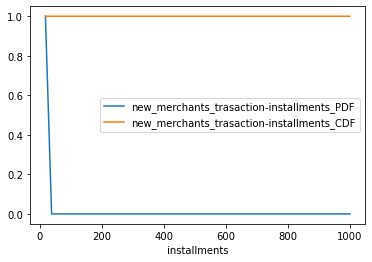

In [279]:
pdf_cdf('installments',new_merchants_trasaction)



new_merchants_trasaction-purchase_amount PDF-Data
: [9.97927694e-01 1.55066323e-03 3.01574453e-04 1.05958592e-04
 4.89039653e-05 2.59802316e-05 1.32448239e-05 7.13182828e-06
 3.05649783e-06 3.56591414e-06 3.05649783e-06 3.05649783e-06
 1.52824892e-06 1.01883261e-06 2.03766522e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.09416306e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.09416306e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 5.09416306e-07]


new_merchants_trasaction-purchase_amount CDF-Data
: [0.99792769 0.99947836 0.99977993 0.99988589 0.99993479 0.99996077
 0.99997402 0.99998115 0.99998421 0.99998777 0.99999083 0.9999

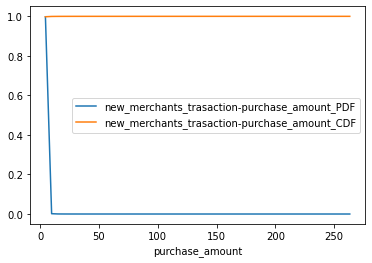

In [283]:
pdf_cdf('purchase_amount',new_merchants_trasaction)



new_merchants_trasaction-month_lag PDF-Data
: [0.52348486 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.47651514]


new_merchants_trasaction-month_lag CDF-Data
: [0.52348486 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486
 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486
 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486
 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486
 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486
 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486 0.52348486
 0.5234

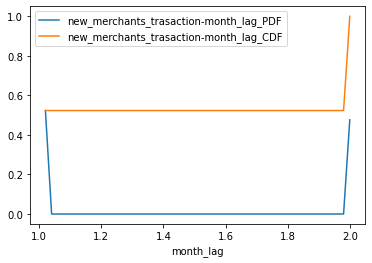

In [285]:
pdf_cdf('month_lag',new_merchants_trasaction)

Here also scenario is quite same just because we only have 2 months of data, that is only reason that we have slightly diffrenet type of pattern. We should treat few extreme datas as outliers.

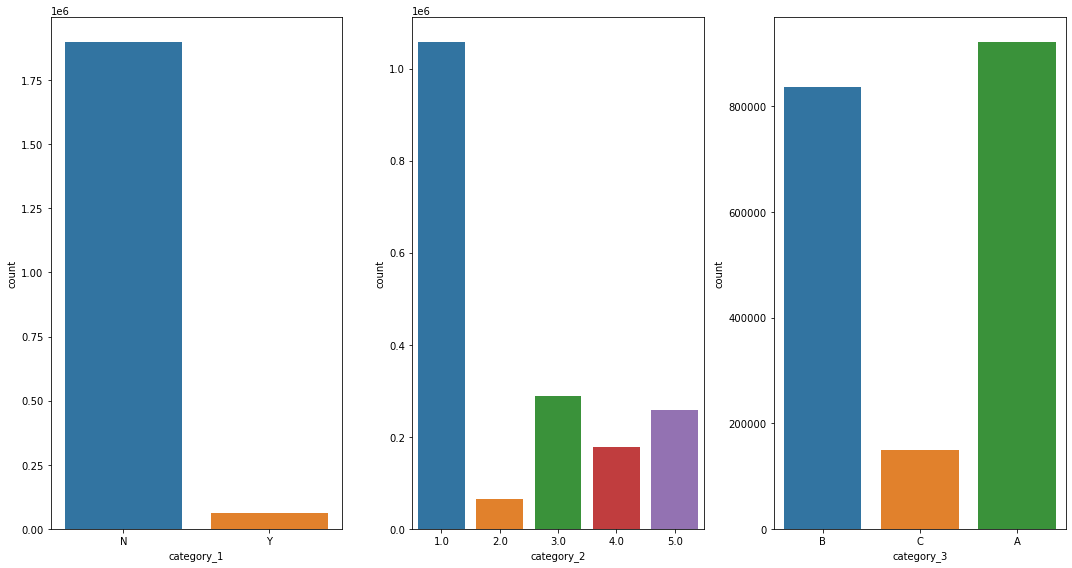

In [33]:

fig, axis = plt.subplots(ncols=3, figsize=(15, 8))

for i in range(1,4):

    sns.countplot(x = 'category_'+str(i), data = new_merchants_trasaction, ax = axis[i-1])
    
fig.tight_layout()
plt.show()

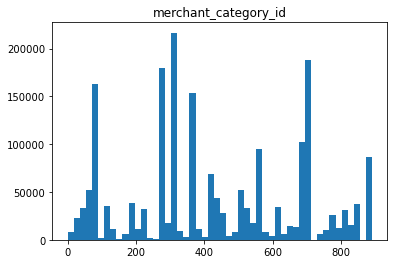

In [34]:
plt.hist(new_merchants_trasaction.merchant_category_id,bins = 50)
plt.title("merchant_category_id")
plt.show()

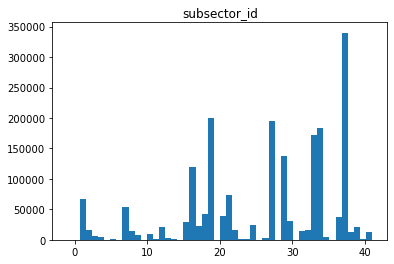

In [36]:
plt.hist(new_merchants_trasaction.subsector_id,bins = 50)
plt.title("subsector_id")
plt.show()

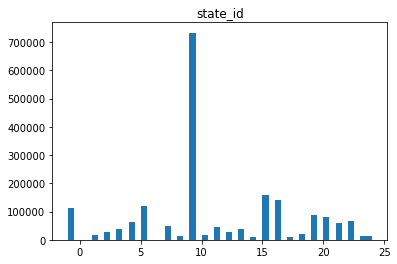

In [38]:
plt.hist(new_merchants_trasaction.state_id,bins = 50)
plt.title("state_id")
plt.show()

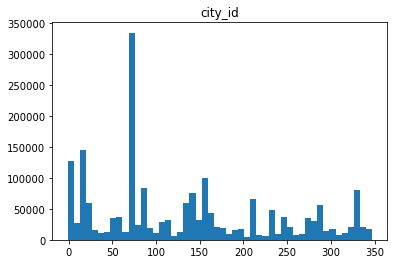

In [40]:
plt.hist(new_merchants_trasaction.city_id,bins = 50)
plt.title("city_id")
plt.show()

In [62]:
print("No of test card id that are not present in new_merchant_Tracsaction: ",
      len(set(test_cards) - set(new_merchants_trasaction.card_id)))

print("No of train card id that are not present in new_merchant_Tracsaction: ",
      len(set(train_cards) - set(new_merchants_trasaction.card_id)))

No of test card id that are not present in new_merchant_Tracsaction:  13608
No of train card id that are not present in new_merchant_Tracsaction:  21931


In [63]:
print(" No of card ids of new_merchant_transaction that are not preset in historical_transaction",
len(set(new_merchants_trasaction.card_id)-set(Historical_Transaction_cards)))

 No of card ids of new_merchant_transaction that are not preset in historical_transaction 0


In [43]:
#imputting missing values with most frequent class

imputer = lambda x: x.fillna(x.value_counts().index[0])
new_merchants_trasaction_clean = new_merchants_trasaction.apply(imputer)
new_merchants_trasaction_clean

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,1.0,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,1.0,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963026,Y,C_ID_1320dee851,142,N,0,A,309,M_ID_7754b67f3b,2,-0.701828,2018-04-06 14:36:52,3.0,19,21
1963027,Y,C_ID_f112aa3381,158,N,0,A,560,M_ID_da063195b7,2,-0.694390,2018-03-07 13:19:18,1.0,15,34
1963028,Y,C_ID_bd97b86450,69,N,1,B,278,M_ID_9a9ccb6544,1,-0.621031,2018-03-05 12:04:56,1.0,9,37
1963029,Y,C_ID_c0513fd84f,130,N,0,A,367,M_ID_40c28d596f,1,-0.656749,2018-03-09 14:47:05,3.0,7,16


In [66]:
new_merchants_trasaction_clean.isna().sum()

authorized_flag         0
card_id                 0
city_id                 0
category_1              0
installments            0
category_3              0
merchant_category_id    0
merchant_id             0
month_lag               0
purchase_amount         0
purchase_date           0
category_2              0
state_id                0
subsector_id            0
dtype: int64

In [67]:
new_merchants_trasaction_clean.to_csv("new_merchants_trasaction_clean")

In [189]:
#No of merchant id's of new merchant that are not present in historical transactions

mer_id_2 = new_merchants_trasaction.merchant_id.unique()
mer_id_1 = Historical_Transaction.merchant_id.unique()

len(set(mer_id_2) - set(mer_id_1))

8322

In [205]:
#No of merchant id's of historical transactions that are not present in new merchant

len(set(mer_id_1) - set(mer_id_2))

108504

In [208]:
# No of merchant id those are present in both of these data sets

len(set(mer_id_1).intersection(set(mer_id_2)))

217808

In [60]:
#Loading the merchants data set
merchants = reduce_mem_usage(pd.read_csv("merchants.csv"))
merchants

Mem. usage decreased to 30.32 Mb (46.0% reduction)


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.400000,...,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.720000,...,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.129997,...,-82.129997,260.000000,2,-82.129997,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334691,M_ID_1f4773aa76,1145,705,33,3.173828,-0.047546,N,A,A,1.000000,...,0.990000,1.019505,6,1.000000,1.024796,12,Y,69,9,1.0
334692,M_ID_725a60d404,35,544,29,-0.057465,-0.057465,Y,A,A,0.890000,...,0.780000,0.813473,6,0.590000,0.606765,12,Y,-1,-1,NaN
334693,M_ID_f2045dd267,35,561,7,-0.057465,-0.057465,N,A,A,0.960000,...,0.900000,0.924769,6,0.740000,0.750763,8,Y,160,21,5.0
334694,M_ID_9139332ccc,35,511,7,-0.057465,-0.057465,Y,A,A,0.940000,...,0.820000,0.783000,6,0.650000,0.584000,12,Y,-1,-1,NaN


In [72]:
merchants.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [73]:
print("Number of unique merchnats ids: ",len(merchants.merchant_id.unique()))

Number of unique merchnats ids:  334633


In [75]:
merchants.isna().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [61]:
#imputting missing values with most frequent class

na_imputer = lambda x: x.fillna(x.mean())
inf_imputer = lambda x: x.replace([np.inf, -np.inf], x.value_counts().index[0])

merchants_clean = merchants.copy()

merchants_clean[['avg_purchases_lag3']] = merchants_clean[['avg_purchases_lag3']].apply(inf_imputer)
merchants_clean[['avg_purchases_lag6']] = merchants_clean[['avg_purchases_lag6']].apply(inf_imputer)
merchants_clean[['avg_purchases_lag12']] = merchants_clean[['avg_purchases_lag12']].apply(inf_imputer)

merchants_clean[['avg_sales_lag3']] = merchants_clean[['avg_sales_lag3']].apply(na_imputer)
merchants_clean[['avg_sales_lag6']] = merchants_clean[['avg_sales_lag6']].apply(na_imputer)
merchants_clean[['avg_sales_lag12']] = merchants_clean[['avg_sales_lag12']].apply(na_imputer)

In [68]:
#Describing non categorical numerical features
merchants_clean[["numerical_1","numerical_2",'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6','avg_purchases_lag12','active_months_lag12','avg_sales_lag12']].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_purchases_lag12,active_months_lag12,avg_sales_lag12
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,3.346960e+05,334696.000000,334696.000000,334696.000000,334696.000000,3.346960e+05
mean,0.011482,0.008095,13.839176,1.590757,2.994108,2.165529e+01,1.887560,5.947397,2.079186,11.599335,2.523125e+01
std,0.000000,0.000000,2395.406738,107.186579,0.095247,3.946970e+03,97.862352,0.394936,88.441988,1.520138,5.251675e+03
min,-0.057465,-0.057465,-82.129997,0.333495,1.000000,-8.213000e+01,0.167045,1.000000,0.098330,1.000000,-8.213000e+01
25%,-0.057465,-0.057465,0.880000,0.923650,3.000000,8.500000e-01,0.902247,6.000000,0.898333,12.000000,8.500000e-01
50%,-0.057465,-0.057465,1.000000,1.016667,3.000000,1.010000e+00,1.026961,6.000000,1.043360,12.000000,1.020000e+00
75%,-0.047546,-0.047546,1.160000,1.146520,3.000000,1.230000e+00,1.215556,6.000000,1.266451,12.000000,1.290000e+00
max,183.750000,182.125000,851844.625000,61851.333333,3.000000,1.513959e+06,56077.500000,6.000000,50215.555556,12.000000,2.567408e+06


### Dist Plots of numerical columns

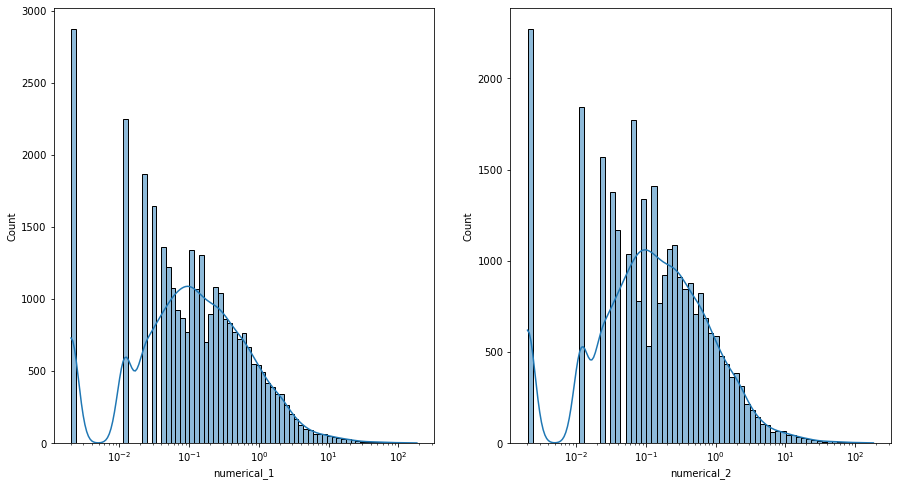

In [74]:
fig, axis = plt.subplots(ncols=2, figsize=(15, 8))



sns.histplot(x = 'numerical_1', data = merchants_clean, log_scale=True, ax = axis[0], kde=True)
sns.histplot(x = 'numerical_2', data = merchants_clean, log_scale=True, ax = axis[1], kde=True)



plt.show()


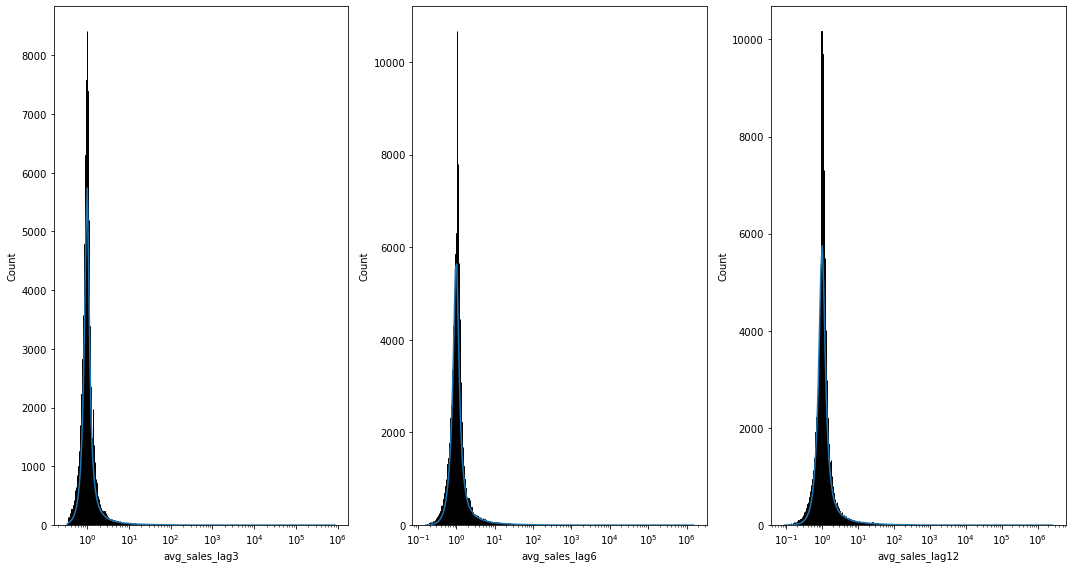

In [87]:
fig, axis = plt.subplots(ncols=3, figsize=(15, 8))



sns.histplot(x = 'avg_sales_lag3', data = merchants_clean, log_scale=True, ax = axis[0], kde=True)
sns.histplot(x = 'avg_sales_lag6', data = merchants_clean, log_scale=True, ax = axis[1], kde=True)
sns.histplot(x = 'avg_sales_lag12', data = merchants_clean, log_scale=True, ax = axis[2], kde=True)

fig.tight_layout()
plt.show()

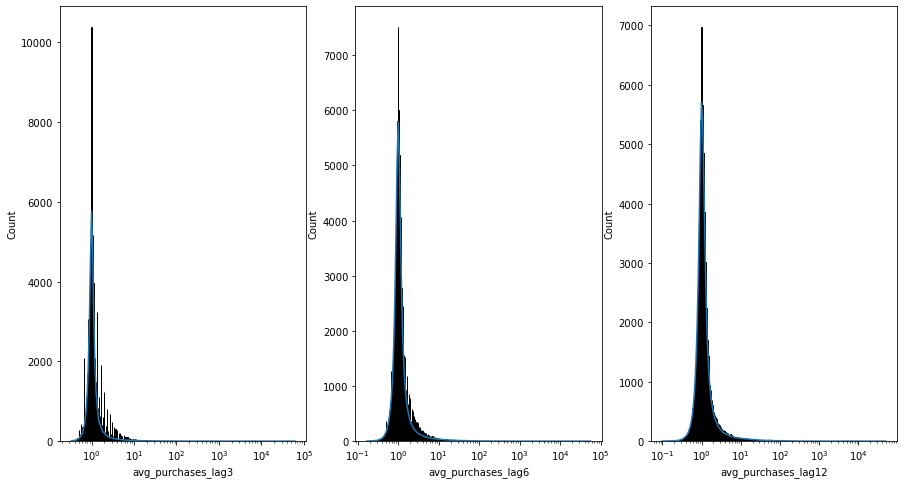

In [84]:
fig, axis = plt.subplots(ncols=3, figsize=(15, 8))



sns.histplot(x = 'avg_purchases_lag3', data = merchants_clean, log_scale=True, ax = axis[0], kde=True)
sns.histplot(x = 'avg_purchases_lag6', data = merchants_clean, log_scale=True, ax = axis[1], kde=True)
sns.histplot(x = 'avg_purchases_lag12', data = merchants_clean, log_scale=True, ax = axis[2], kde=True)


plt.show()

### Barplots for categorical columns

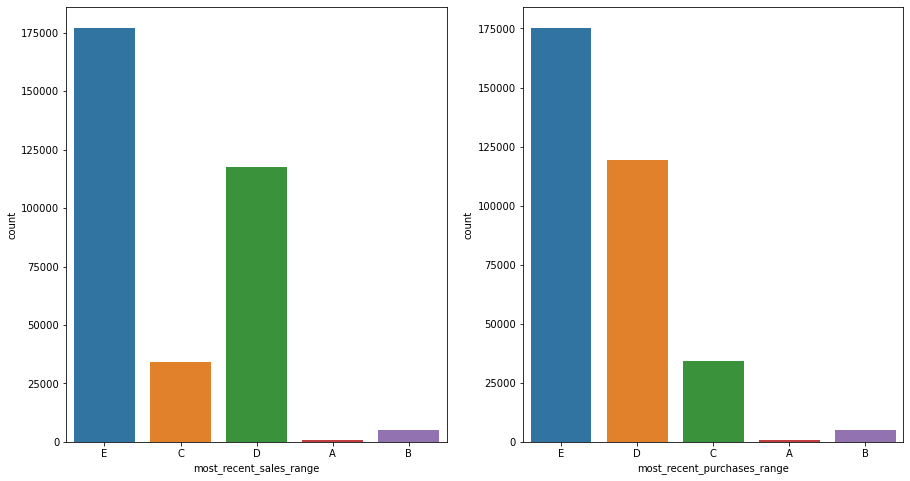

In [64]:
fig, axis = plt.subplots(ncols=2, figsize=(15, 8))



sns.countplot(x = 'most_recent_sales_range', data = merchants_clean, ax = axis[0])
sns.countplot(x = 'most_recent_purchases_range', data = merchants_clean, ax = axis[1])



plt.show()



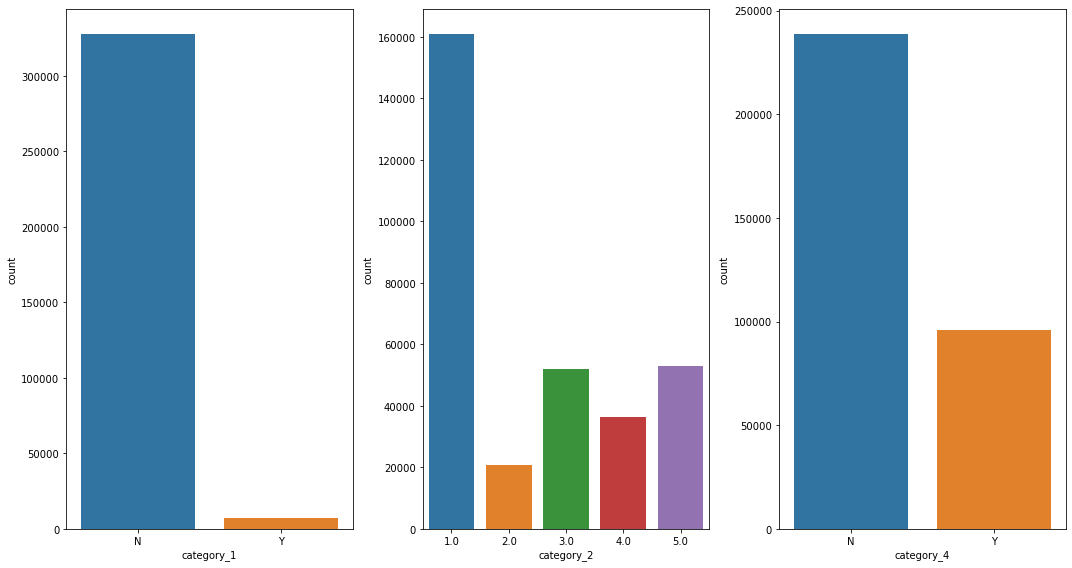

In [88]:
fig, axis = plt.subplots(ncols=3, figsize=(15, 8))



sns.countplot(x = 'category_1', data = merchants_clean, ax = axis[0])
sns.countplot(x = 'category_2', data = merchants_clean, ax = axis[1])
sns.countplot(x = 'category_4', data = merchants_clean, ax = axis[2])

fig.tight_layout()

plt.show()

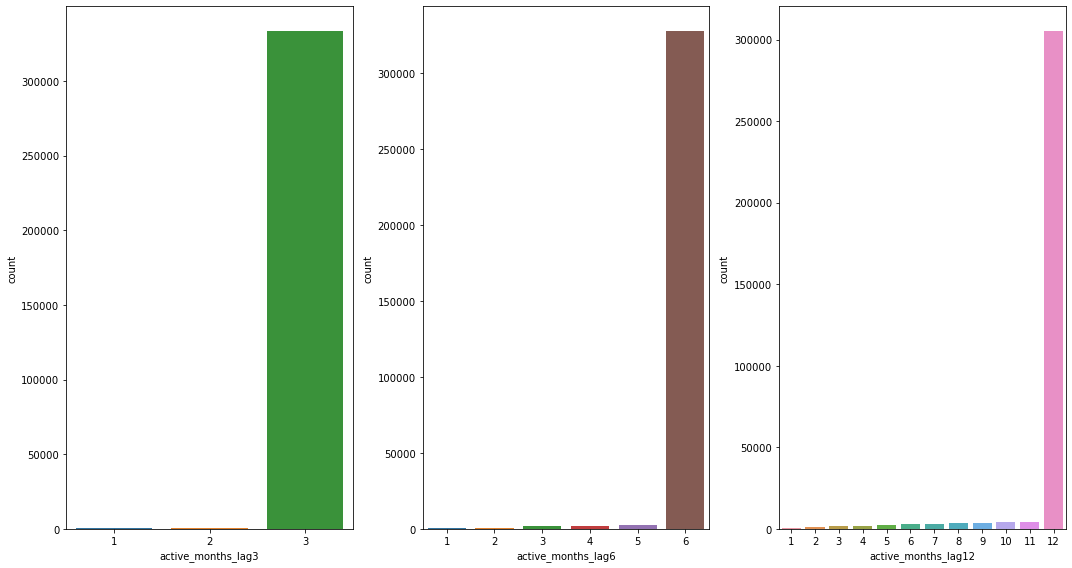

In [89]:
fig, axis = plt.subplots(ncols=3, figsize=(15, 8))



sns.countplot(x = 'active_months_lag3', data = merchants_clean, ax = axis[0])
sns.countplot(x = 'active_months_lag6', data = merchants_clean, ax = axis[1])
sns.countplot(x = 'active_months_lag12', data = merchants_clean, ax = axis[2])
fig.tight_layout()

plt.show()

In [86]:
merchants_clean.isna().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                     0
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                     0
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                    0
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [86]:
merchants_clean.to_csv("merchants_clean")

## Eda on purchase ammount

In [87]:
#pd.DataFrame(h_purchase,columns = [['card_id','purchase_amount']],index = False)
h_purchase = Historical_Transaction_clean.groupby("card_id")
h_purchase = h_purchase.purchase_amount.mean().reset_index()
h_purchase.describe()

,purchase_amount
count,325540.000000
mean,1.497803
std,878.426994
min,-0.745643
25%,-0.679067
50%,-0.621130
75%,-0.500482
max,500883.004724


In [91]:
#only considering cards with <= 98 percentile of average purchase amount
h_purchase = h_purchase.loc[h_purchase.purchase_amount <= np.percentile(h_purchase.purchase_amount,98)]

<AxesSubplot:ylabel='Density'>

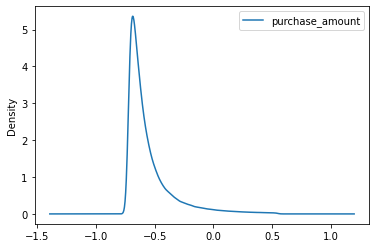

In [92]:
h_purchase.plot(kind = "kde")


In [82]:
train_p = pd.merge(train_table,h_purchase , on="card_id", how="left")

Text(0, 0.5, ' Loyalty Score')

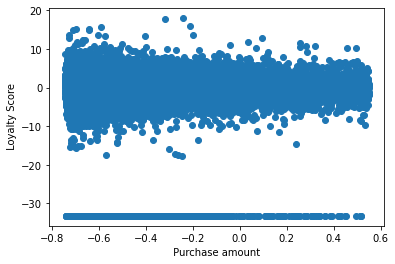

In [88]:
#SCatter plot of total purchase amount vs loyalty score
import matplotlib.pyplot as plt
plt.scatter(train_p.purchase_amount,train_p.target)
plt.xlabel(' Purchase amount ')
plt.ylabel(' Loyalty Score')

In [97]:
#Here I'M taotal number of purchase that each of the card user made
frequency_ht = Historical_Transaction_clean.card_id.value_counts()

In [98]:
frequency_ht = frequency_ht.reset_index()
frequency_ht.columns = ['card_id','frequency']
frequency_ht

,card_id,frequency
0,C_ID_3d3dfdc692,5582
1,C_ID_0cd2ce025c,2912
2,C_ID_cc3d4cd4e3,2143
3,C_ID_5ccc07beb9,2066
4,C_ID_5ea401d358,1786
...,...,...
325535,C_ID_cd35c92246,2
325536,C_ID_2f90c173ef,2
325537,C_ID_de14714c87,2
325538,C_ID_30d4ea0992,2


In [95]:
train_p = pd.merge(train_p,frequency_ht , on="card_id", how="left")

Text(0, 0.5, ' Loyalty Score')

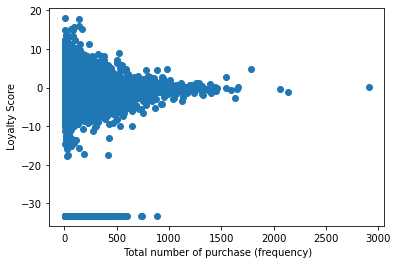

In [99]:
#Scatter plot of total frquency of purchase vs loyalty score
plt.scatter(train_p.frequency,train_p.target)
plt.xlabel(" Total number of purchase (frequency)")
plt.ylabel(" Loyalty Score")

Text(0, 0.5, ' Average purchase ammount')

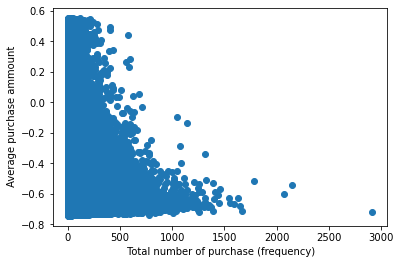

In [100]:
#SCatter plot of total frquency of purchase vs avearage purchase amount
plt.scatter(train_p.frequency,train_p.purchase_amount)

plt.xlabel(" Total number of purchase (frequency)")
plt.ylabel(" Average purchase ammount")

People those who buys more frequent are tend to have less average purchase amount

In [3]:
#train_p.to_csv('train_p')
train_p = pd.read_csv("train_p",index_col = 'Unnamed: 0')
train_p 

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_amount,frequency
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,-0.638341,260
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,-0.600018,350
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,-0.678311,43
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,-0.642745,77
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,-0.366073,133
...,...,...,...,...,...,...,...,...
201912,2017-09-01,C_ID_963962de2c,3,2,1,-2.740821,-0.709244,46
201913,2015-10-01,C_ID_1314773c0b,3,1,1,0.312917,-0.711339,47
201914,2017-08-01,C_ID_7666735b3d,4,3,0,0.093494,-0.381465,87
201915,2016-07-01,C_ID_73f5a0efd0,3,2,1,-4.676589,-0.688037,26


In [25]:
train_p['purchase_amount'].fillna(np.mean(train_p['purchase_amount']), inplace =True)
train_p

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_amount,frequency
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,-0.638341,260
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,-0.600018,350
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,-0.678311,43
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,-0.642745,77
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,-0.366073,133
...,...,...,...,...,...,...,...,...
201912,2017-09-01,C_ID_963962de2c,3,2,1,-2.740821,-0.709244,46
201913,2015-10-01,C_ID_1314773c0b,3,1,1,0.312917,-0.711339,47
201914,2017-08-01,C_ID_7666735b3d,4,3,0,0.093494,-0.381465,87
201915,2016-07-01,C_ID_73f5a0efd0,3,2,1,-4.676589,-0.688037,26


# Multivariate Analysis to get relation with target column

### plotting heat map for correaltion matrix

In [102]:
train_p.corr()

,feature_1,feature_2,feature_3,target,purchase_amount,frequency
feature_1,1.000000,-0.130969,0.583092,0.012056,0.170229,0.016334
feature_2,-0.130969,1.000000,0.060925,0.012020,-0.120476,-0.001444
feature_3,0.583092,0.060925,1.000000,0.024274,-0.093509,-0.019213
target,0.012056,0.012020,0.024274,1.000000,-0.020251,0.053028
purchase_amount,0.170229,-0.120476,-0.093509,-0.020251,1.000000,-0.142568
frequency,0.016334,-0.001444,-0.019213,0.053028,-0.142568,1.000000


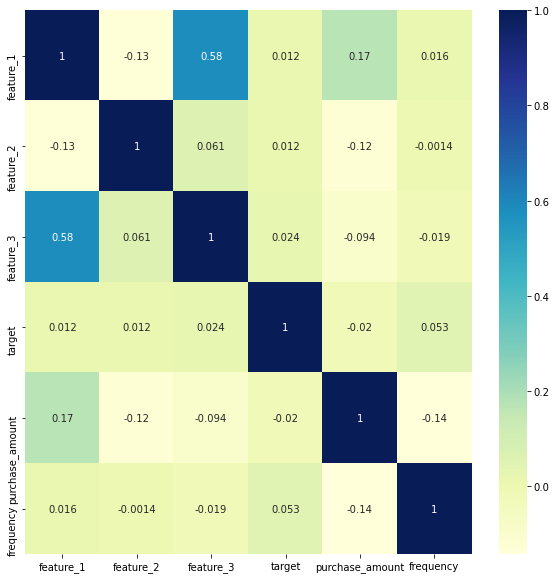

In [107]:
plt.figure(figsize=(10,10))

dataplot = sn.heatmap(train_p.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

### plotting scatter plot to show relation between terget, purchase_amount, and frequency

In [7]:
train_sorted = train_p.sort_values(by = 'target')


In [135]:
train_sorted

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_amount,frequency
26592,2017-03-01,C_ID_7e285a535a,-0.931842,-0.992082,-1.140992,-33.219281,-0.281576,-0.165327
171057,2016-07-01,C_ID_a9621be848,1.597335,0.338839,0.876431,-33.219281,-0.607645,-0.748469
10886,2017-04-01,C_ID_533e6a4bf9,0.754276,-0.992082,-1.140992,-33.219281,0.347414,1.048756
17186,2014-06-01,C_ID_c8175a3cf7,-0.088783,1.669759,0.876431,-33.219281,-0.345809,-0.662432
171087,2015-09-01,C_ID_f2a0a48179,1.597335,-0.992082,0.876431,-33.219281,0.033078,-0.308723
...,...,...,...,...,...,...,...,...
82971,2016-11-01,C_ID_ecc4e2e188,1.597335,0.338839,0.876431,15.294621,-0.438520,-0.251364
4459,2017-05-01,C_ID_700c15a07d,-0.088783,0.338839,0.876431,15.606405,-0.179960,0.006748
162468,2017-02-01,C_ID_b0f1d28bd3,1.597335,-0.992082,0.876431,15.994455,1.734231,0.475173
4460,2017-01-01,C_ID_1c8a5b9d44,1.597335,-0.992082,0.876431,17.675716,1.205812,0.494293


In [8]:
from scipy import stats

train_sorted['frequency'] =   stats.zscore(train_sorted['frequency'])

#from sklearn.preprocessing import StandardScaler
  
#train_sorted['purchase_amount'] =   stats.zscore(train_sorted['purchase_amount'])
#scaler = StandardScaler()
#train_sorted[['purchase_amount','frequency']] = scaler.fit_transform(train_sorted[['purchase_amount','frequency']])

Text(0, 0.5, ' Average purchase ammount &  Total number of purchase (frequency) ')

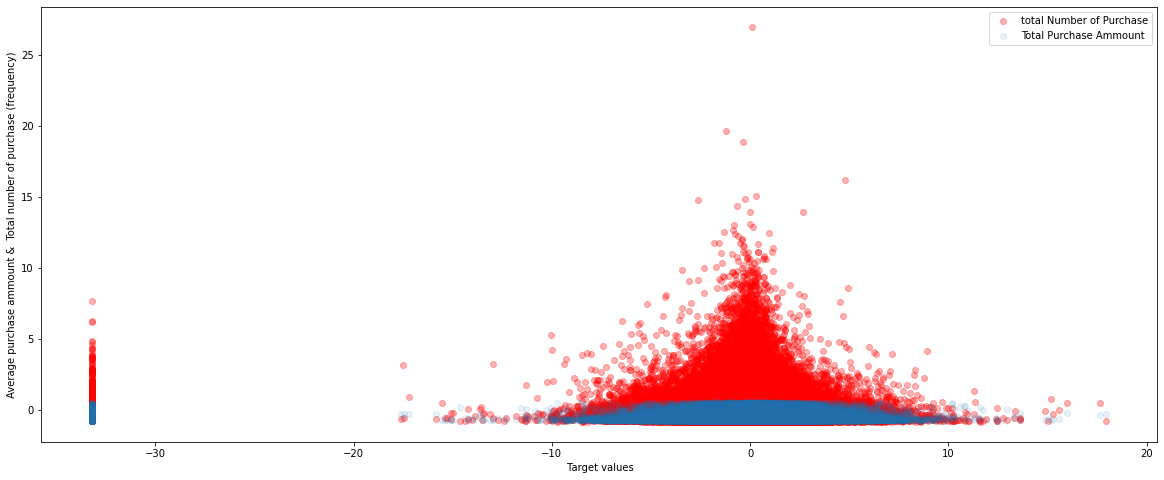

In [9]:
plt.figure(figsize = (20,8))
plt.scatter(train_sorted.target, train_sorted.frequency,alpha = .3,c='red', label="total Number of Purchase")
plt.scatter(train_sorted.target, train_sorted.purchase_amount, alpha = .1, label="Total Purchase Ammount")
#plt.plot(train_sorted.target, train_sorted.feature_3)
plt.legend()
plt.xlabel(" Target values")
plt.ylabel(" Average purchase ammount &  Total number of purchase (frequency) ")

### plotting scatter plot to show realtion between feture 1,2,3 and target

Text(0, 0.5, ' Average purchase ammount &  Total number of purchase (frequency) ')

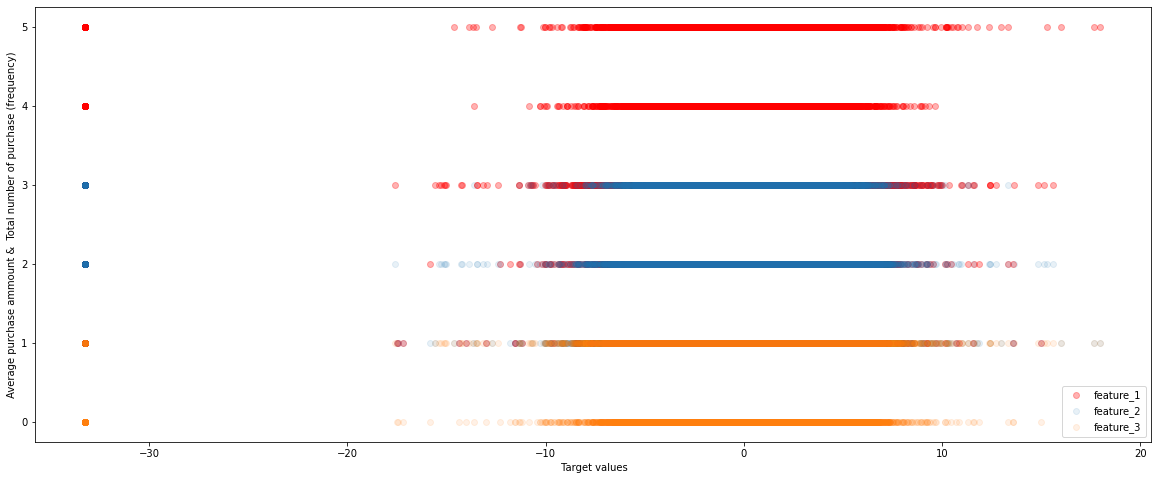

In [187]:
plt.figure(figsize = (20,8))
plt.scatter(train_sorted.target, train_sorted.feature_1,alpha = .3,c='red', label="feature_1")
plt.scatter(train_sorted.target, train_sorted.feature_2, alpha = .1, label="feature_2")
plt.scatter(train_sorted.target, train_sorted.feature_3, alpha = .1, label="feature_3")
#plt.plot(train_sorted.target, train_sorted.feature_3)
plt.legend()
plt.xlabel(" Target values")
plt.ylabel(" Average purchase ammount &  Total number of purchase (frequency) ")

Text(0, 0.5, ' Average purchase ammount')

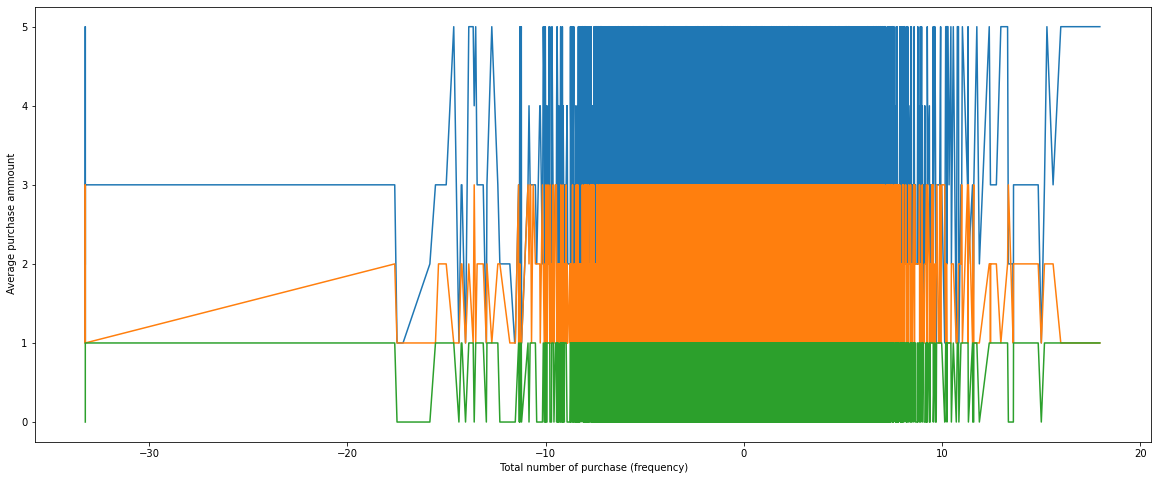

In [112]:
#Relation with target, purchase_amount and frquency(total number of purchase made by user)
plt.figure(figsize = (20,8))
plt.plot(train_sorted.target, train_sorted.feature_1,label  = 'Number of Purchase')
plt.plot(train_sorted.target, train_sorted.feature_2)
plt.plot(train_sorted.target, train_sorted.feature_3)

plt.xlabel(" Total number of purchase (frequency)")
plt.ylabel(" Average purchase ammount")

### Plotting with tsne generated dimensions to understand how much these features could be useful

In [41]:
# Mapping target to a catogical coulmn just for visulalizatio
def map_target(x):
    if x == 0: return 0 # Peopele with neutral loyalty score
    elif x >= 0: return 1 # People those are loyal
    else: return 2 # People those are not loyal

train_p['target'] = train_p['target'].apply(map_target)

In [42]:
train_p


,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_amount,frequency
0,2017-06-01,C_ID_92a2005557,5,2,1,2,-0.638341,260
1,2017-01-01,C_ID_3d0044924f,4,1,0,1,-0.600018,350
2,2016-08-01,C_ID_d639edf6cd,2,2,0,1,-0.678311,43
3,2017-09-01,C_ID_186d6a6901,4,3,0,1,-0.642745,77
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,2,-0.366073,133
...,...,...,...,...,...,...,...,...
201912,2017-09-01,C_ID_963962de2c,3,2,1,2,-0.709244,46
201913,2015-10-01,C_ID_1314773c0b,3,1,1,1,-0.711339,47
201914,2017-08-01,C_ID_7666735b3d,4,3,0,1,-0.381465,87
201915,2016-07-01,C_ID_73f5a0efd0,3,2,1,2,-0.688037,26


In [44]:
from sklearn.model_selection import train_test_split
X = train_p.drop(['card_id','target','first_active_month'], axis=1)
y = train_p['target']

X, X_cv, y, y_cv = train_test_split(X, y,stratify=y,test_size=0.80)

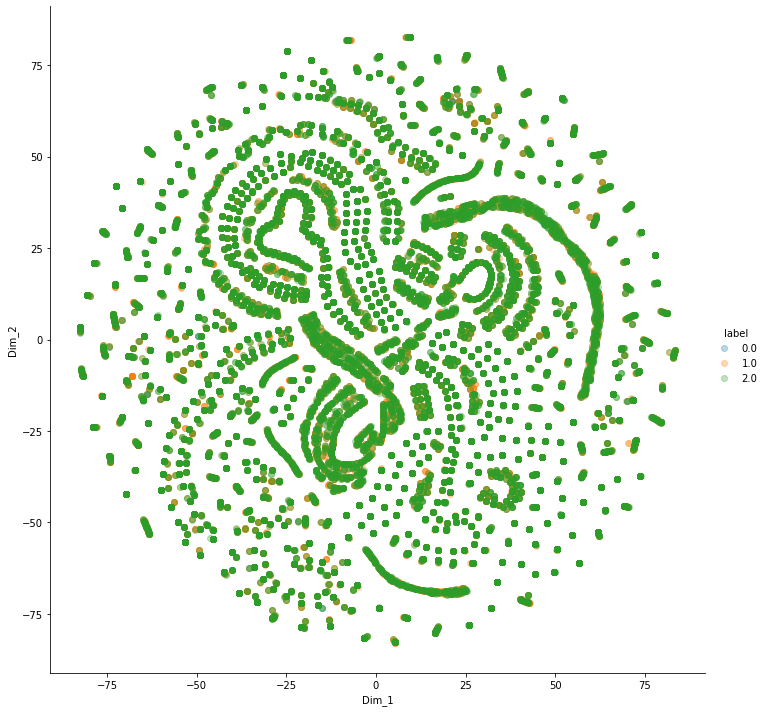

In [98]:
import seaborn as sn
from sklearn.manifold import TSNE

#fitting data to tsne
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(X)

#getting DF for tsne transformed dimensions with labels
y = np.array(y)
y = y.reshape(-1,1)
results1 = np.hstack((results,y))

tsne_df = pd.DataFrame(data= results1, columns=("Dim_1", "Dim_2", "label"))

#plt.figure(figsize=(20,20))
#Plotting
sn.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2', alpha = .3).add_legend()
plt.show()

## From above observation we can to predict the targets more fetures might be needed since so overlap is there.